In [1]:
library(data.table)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [3]:
##Getting top snp positions from clustering results of:
    #t1->11 (summer to fall transition) 
    #as well as best matched intervals to 2014 study(t1->7; t3->9; t5->12; t7->9)
df.clust = read.csv('df.clust.orch2021.csv')
df.snp = df.clust %>% dplyr::select(chrom, bestSNP.pos) %>% rename(pos = bestSNP.pos)
write.table(df.snp, paste0('./BestSnpPositions.ECage.2021.tsv'), sep = '\t', quote = FALSE, row.names = FALSE)



In [ ]:
###Top snp position file is used in script Orch2021_Ecage_FixedLociHits_dmel_noconfig_NEW.py to get genes that top snps are in
#This output the TopGenes.ECage.2021.tsv file
#the FB ID's in this file were used in modPHEA and below to compare to 2014 results

In [9]:
##Comparing 2104 and 2021 top genes
orch.14.genes = read.csv('./2014_GeneIDs.csv')
orch.21.genes = read.csv('./TopGenes.ECage.2021.tsv', sep = '\t')

df = as.data.frame(intersect(orch.14.genes$ID, orch.21.genes$ID))
names(df) = 'Gene'
df = orch.21.genes %>% filter(ID %in% df$Gene)
df = df %>% distinct(ID, NAME)
write.csv(df, './orch21.orch14.TopGeneOverlap.csv', row.names = FALSE)

In [10]:
#looking at non-overlapping genes to re-run modphea
df = read.csv('./TopGenes.ECage.2021.tsv', sep = '\t')
df.over = read.csv('./orch21.orch14.TopGeneOverlap.csv')
df.uniq = df %>% filter(!ID %in% df.over$ID )
write.csv(df.uniq, './UniqueTopGenes.orch21.Ecage.csv', row.names = FALSE)


In [12]:
#Get number of FBID's in flybase for comparison of observed vs. expected FBID overlap
d.mel.genes = fread('./dmel2014_AllGeneCoords.txt')
length(unique(d.mel.genes$FBID))

[1] 17294

In [14]:
##Statistics of expected overlap
d.mel.genes = fread('./dmel2014_AllGeneCoords.txt')
leng.list1 = length(unique(orch.14.genes$ID))
leng.list2 = length(unique(orch.21.genes$ID))

gene.vec = as.data.frame(1:length(unique(d.mel.genes$FBID)))
names(gene.vec) = c('gene')

overlap = matrix(nrow = 5000)
for (i in 1:nrow(overlap)){
    samp.1 = gene.vec %>% sample_n(leng.list1)
    samp.2 = gene.vec %>% sample_n(leng.list2)
    intersect = length(intersect(samp.1$gene, samp.2$gene))
    overlap[i, ] = intersect 
}
overlap = as.data.frame(overlap)
names(overlap) = c('intersect')



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


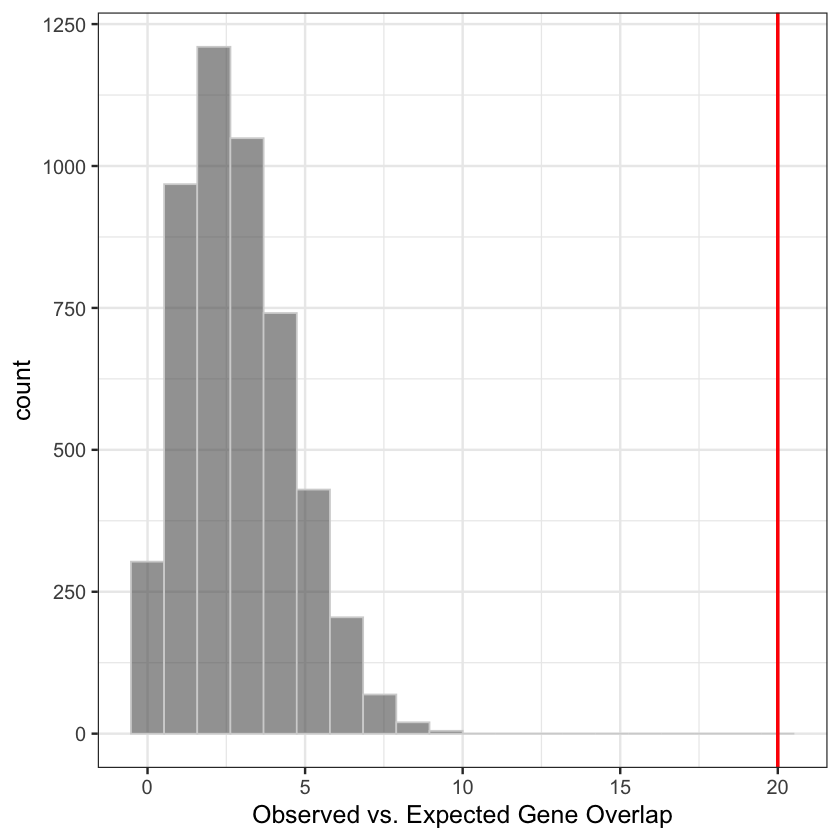

In [15]:
ggplot(overlap, aes(x = intersect)) +
    geom_histogram(bins = 20, color='light grey', alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("light grey")) +
    theme_bw(base_size = 15) +
    xlab('Observed vs. Expected Gene Overlap')+
    geom_vline(xintercept = nrow(df.over), colour = 'red', size = 1)

In [16]:
median(overlap$intersect)

[1] 3

In [ ]:
##Comparing ModPhea Results

In [2]:
mod.21 = read.csv('./ModPhea_Orchard2021.csv')
mod.14 = read.csv('./ModPhea_Orchard2014.csv')

In [5]:
names(mod.21) = c('Phenotype', 'PhenotypeID', 'PercentInSet', 'PercentInBackground', 'FishersP', 'BHFDR.P', 'BonfP')
names(mod.14) = c('Phenotype', 'PhenotypeID', 'PercentInSet', 'PercentInBackground', 'FishersP', 'BHFDR.P', 'BonfP')

In [6]:
mod.21 = mod.21 %>% filter(BHFDR.P < 0.05)
mod.14 = mod.14 %>% filter(BHFDR.P < 0.05)

In [9]:
#Comparing across years and with genes under selection in melanogaster
sp.genes = fread('./MelanogasterAdaptiveGenes', header = FALSE)
names(sp.genes) = 'ID'
write.table(sp.genes, './MelanogasterAdaptiveGenes.csv', row.names = FALSE)

In [11]:
mel.orch14.overlap = as.data.frame(intersect(sp.genes$ID, orch.14.genes$ID))
mel.orch21.overlap = as.data.frame(intersect(sp.genes$ID, orch.21.genes$ID))
orch14.21.overlap = as.data.frame(intersect(orch.14.genes$ID, orch.21.genes$ID))
mel.orch.overlap = as.data.frame(intersect(sp.genes$ID, orch14.21.overlap[,1]))

In [14]:
df  = orch.21.genes %>% filter(ID %in% mel.orch14.overlap[,1])
write.csv(df, './orch21.orch14.geneoverlap.csv', row.names = FALSE)

In [15]:
df  = orch.21.genes %>% filter(ID %in% mel.orch21.overlap[,1])

In [16]:
write.csv(df, './orch21.melano.geneoverlap.csv', row.names = FALSE)

In [15]:
##Statistics of expected overlap
leng.list1 = nrow(orch.14.genes)
leng.list2 = nrow(orch.21.genes)

gene.vec = as.data.frame(1:13500)
names(gene.vec) = c('gene')

overlap = matrix(nrow = 1000)
for (i in 1:nrow(overlap)){
    samp.1 = gene.vec %>% sample_n(leng.list1)
    samp.2 = gene.vec %>% sample_n(leng.list2)
    intersect = length(intersect(samp.1$gene, samp.2$gene))
    overlap[i, ] = intersect 
}
overlap = as.data.frame(overlap)
names(overlap) = c('intersect')

ggplot(overlap, aes(x = intersect)) +
    geom_histogram(bins = 15) +
    xlim(0, 20) +
    theme_bw() +
    geom_vline(xintercept = nrow(orch14.21.overlap), colour = 'red')
    

In [50]:
samp.1 = gene.vec %>% sample_n(leng.list1)
samp.2 = gene.vec %>% sample_n(leng.list2)

In [65]:
length(intersect(samp.1$gene, samp.2$gene))

[1] 3

In [ ]:
#PANGEA results comparison

In [25]:
pan.mel = read.csv('./PANGEA_MelanogasterGenes.csv')
pan.21 = read.csv('./PANGEA_orch21.csv')
pan.14 = read.csv('./PANGEA_orch14.csv')

In [26]:
length((intersect(pan.14$Gene.Set.Name, pan.21$Gene.Set.Name)))
length((intersect(pan.mel$Gene.Set.Name, pan.21$Gene.Set.Name)))

[1] 47

[1] 48

In [14]:
(intersect(pan.mel$Gene.Set.Name, pan.21$Gene.Set.Name))

[1] "abnormal cell number"                 
 [2] "abnormal oxidative stress response"   
 [3] "abnormal flight"                      
 [4] "abnormal chemosensitive behavior"     
 [5] "abnormal feeding behavior"            
 [6] "abnormal memory"                      
 [7] "decreased occurrence of cell division"
 [8] "hyperactive"                          
 [9] "abnormal developmental rate"          
[10] "hypoactive"                           
[11] "abnormal sleep"                       
[12] "chemical resistant"                   
[13] "abnormal cell migration"              
[14] "abnormal auditory perception"         
[15] "female semi-sterile"                  
[16] "abnormal circadian rhythm"            
[17] "abnormal learning"                    
[18] "abnormal planar polarity"             
[19] "abnormal locomotor behavior"          
[20] "abnormal behavior"                    
[21] "abnormal cell shape"                  
[22] "decreased fecundity"                  
[23] "abnormal heat stress response"        
[24] "abnormal touch response"              
[25] "chemical sensitive"                   
[26] "abnormal size"                        
[27] "abnormal neurophysiology"             
[28] "abnormal immune response"             
[29] "abnormal temperature response"        
[30] "abnormal circadian behavior"          
[31] "semi-sterile"                         
[32] "abnormal sensory perception"          
[33] "abnormal body size"                   
[34] "abnormal cell death"                  
[35] "male sterile"                         
[36] "abnormal cell size"                   
[37] "abnormal starvation stress response"  
[38] "short lived"                          
[39] "abnormal smell perception"            
[40] "abnormal stress response"             
[41] "abnormal body color"                  
[42] "abnormal mating"                      
[43] "sterile"                              
[44] "abnormal mating behavior"             
[45] "abnormal neuroanatomy"                
[46] "female sterile"                       
[47] "abnormal cell cycle"                  
[48] "abnormal pain response"

In [27]:
(length(intersect(pan.mel$Gene.Set.Name, pan.21$Gene.Set.Name)))/nrow(pan.21)

[1] 0.8888889